EDA on Haberman’s Cancer Survival Dataset
1. Understanding the dataset
Title: Haberman’s Survival Data
Description: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
Attribute Information:
Age of patient at the time of operation (numerical)
Patient’s year of operation (year — 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) :
1 = the patient survived 5 years or longer
2 = the patient died within 5 years


Haberman's Cancer Survival - EDA
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

FEATURES:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
[Missisng values: Zero]

About Lymphatic Nodes:

Lymphatic system tend to cluster around armpits, neck and belly
Cancer spreads in predictable fashion form breast to lymph glands
Cancer in lymph nodes - Perhaps single most factor in predicting outcomes
If cancer is detected in Lymph nodes - Surgery for axillary disection
Domain Knowledge Note:

Here, positive axil nodes may not tell anything about survival except for presence of cancer. More positive nodes imply more chances of cancer.

In other words, we might be predicting survival of patient on surgery when he didn't have cancer at all. To much profit for hospitals >_<

OBJECTIVE:

To predict the survival chances of patients who had undergone breast surgery for a period of 5 years and above depending og given featues

(Breast Surgery may possibly mean removal of lymph nodes as well as tumor)



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline

In [23]:
# load haberman.csv into a pandas dataframe
haberman = pd.read_csv('downloads/haberman.csv')

In [25]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [27]:
haberman.shape
# csv file contains 306 rows and 4 columns

(306, 4)

In [28]:
haberman.size

1224

In [30]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [31]:
haberman.info()
# there are no null values or missing data
# all features are in numerical or continous 
# al the columns are of the integer dataset
# the class or dependent feature is in interger typpr so convert to categorical 
# in the status column or class, the value 1 can be mapped to 'yes' which means the patient survived 5 years or longer 2
# the value 2 can be mapped to 'No' which means the patient died within 5 year ot patients not survived within 5 years

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [32]:
haberman['status']=haberman['status'].map({1:'Yes',2:'No'})

In [33]:
haberman.head()

,age,year,nodes,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [34]:
haberman.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [38]:
haberman['status'].value_counts()
# the value_counts() function state that how many datapoints for each class are present.
# here it tells that patient survived 5 years or longer or how many didnot survived within  years
# out of  306 patients, 225 survived and 81 did not
# the given dataset is imbalanced

Yes    225
No      81
Name: status, dtype: int64

In [43]:
status_yes = haberman[haberman['status']=='Yes']

In [44]:
status_yes.describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [45]:
status_no = haberman[haberman['status']=='No']

In [46]:
status_no.describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


observation: mean age and mean year are almost very close for both classes whereas mean nodes have a difference of 5 units approx



the nodes of patients who survived are less when compared to patients who did not survived


Note : auxillary nodes lead to breast cancer which should be less for survives patients

## Univariate analysis

the main purpose of the univariate analysis is to describe,summarize and find patterns in the single feature

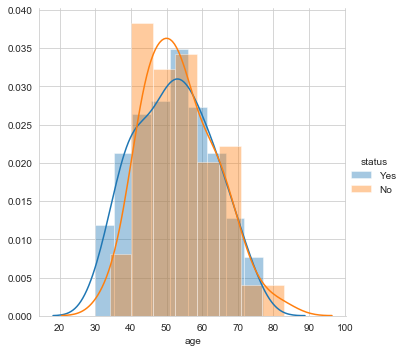

In [49]:
sns.set_style('whitegrid')
sns.FacetGrid(data=haberman,hue='status',height =5)\
.map(sns.distplot,'age')\
.add_legend()
plt.show()

Major overlapping takes place if we observe here,
so survival chances of the patients is irrespective of the patients age.


although there are overlapping, we can vaguely tell that people whose age is in the range of 30 to 40 are more likely to survive.

and 40 to 60 are less likely to survive and patients whose age in the range of 60 to 75 are equal chances of surviving and not surviving

yet, this cannot be our final conclusion. we cannot decide the survival chances of a patient just by considering the age parameter.



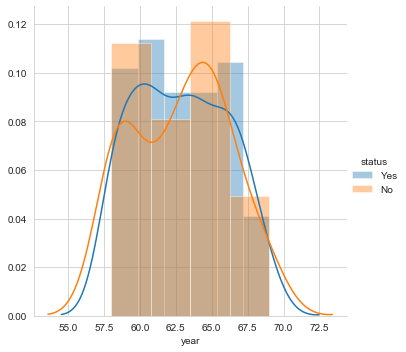

In [52]:
sns.set_style('whitegrid')
sns.FacetGrid(data=haberman, hue='status',height=5)\
.map(sns.distplot,'year')\
.add_legend()
plt.show()

This is major overlapping observed, this graph only says that how many of the operations were successful and how many weren't.
this cannot be a parameter to decide the patient survival chances.

However, it can be observed that in the years 1960 to 1965 there were more unsuccesful operations


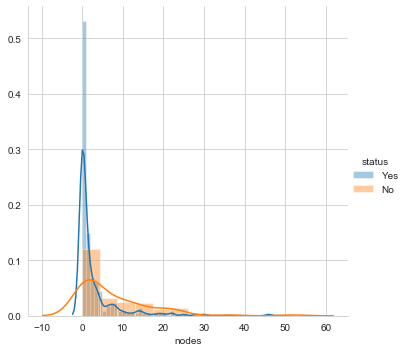

In [54]:
sns.set_style('whitegrid')
sns.FacetGrid(data=haberman, hue='status',height=5)\
.map(sns.distplot,'nodes').add_legend()
plt.show()

patients with no nodes or 1 nodes are more likely to survive.
there would be a few chances of surviving if the nodes are 25 or more nodes

counts1 = [0.18164251 0.0173913  0.00483092 0.0057971  0.00386473 0.00096618
 0.00193237 0.         0.         0.00096618]
bin_edges1 = [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
pdf = [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
cdf = [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
*************************************************
counts2[0.10921178 0.02849003 0.02611586 0.00949668 0.01424501 0.
 0.00237417 0.         0.         0.00237417]
bin_edges2
pdf[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
cdf[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


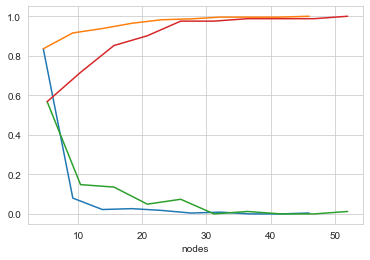

In [76]:
counts1 , bin_edges1 = np.histogram(status_yes['nodes'],bins=10,density=True)
print('counts1 = {}'.format(counts1))
print('bin_edges1 = {}'.format(bin_edges1))
pdf = counts1 / (sum(counts1))
print('pdf = {}'.format(pdf))
cdf = np.cumsum(pdf)
print('cdf = {}'.format(cdf))

plt.plot(bin_edges1[1:],pdf)
plt.plot(bin_edges1[1:],cdf,label='yes')
plt.xlabel('nodes')

print('*************************************************')

counts2, bin_edges2 = np.histogram(status_no['nodes'],bins=10,density=True)
print('counts2{}'.format(counts2))
print('bin_edges2'.format(bin_edges2))
pdf = counts2 / (sum(counts2))
print('pdf{}'.format(pdf))
cdf = np.cumsum(pdf)
print('cdf{}'.format(cdf))

plt.plot(bin_edges2[1:],pdf)
plt.plot(bin_edges2[1:],cdf,label='yes')
plt.show()

observation: 83.55% of the patients who have survived had nodes in the range of 0 to 4.6
they have very less nodes when compared to others

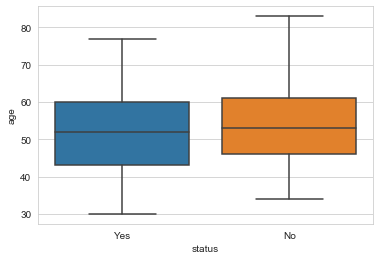

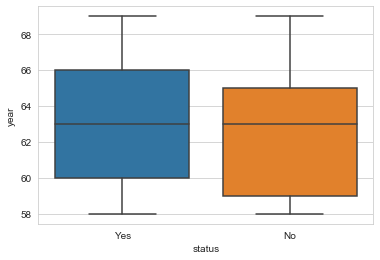

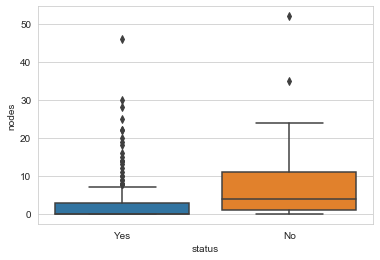

In [80]:
sns.boxplot(x='status',y='age',data=haberman)
plt.show()
sns.boxplot(x='status',y='year',data=haberman)
plt.show()
sns.boxplot(x='status',y='nodes',data=haberman)
plt.show()

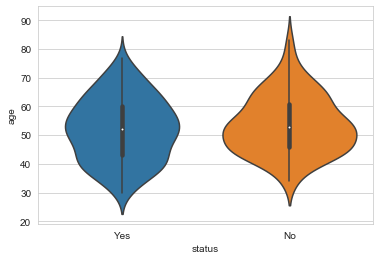

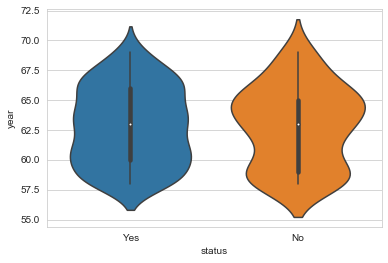

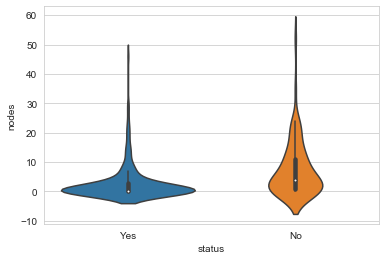

In [81]:
sns.violinplot(x='status',y='age',data=haberman)
plt.show()
sns.violinplot(x='status',y='year',data=haberman)
plt.show()
sns.violinplot(x='status', y='nodes',data=haberman)
plt.show()

observations: 1. patients with more than 1 nodes are not likely to survive.more the no of nodes,lesser the survival chances
2.a large percentage of patients who survived had 0 nodes. yet there is a small percentage of patients who had no auxiallry nodes dies within 5 years of operation. thus an absence of positive auxiallry nodes cannot always gaurantee survival.
3.there were comparitevely more people who got operated in the year 1965 did not survive for morethan 5 years
4.there were comparitevely more people age between 45 to 65 who did not survive.patient age alone is not an important parameter to determining the survival of a patient.
5.The box plots and violin plots for age and year parameters give similar results with a substantial overlap of data points. The overlap in the box plot and the violin plot of nodes is less compared to other features but the overlap still exists and thus it is difficult to set a threshold to classify both classes of patients.

## Bivariate analysis

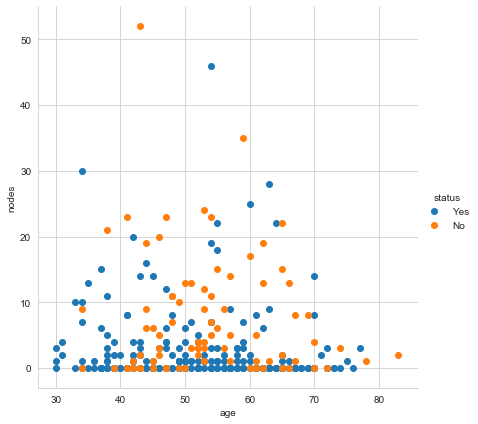

In [89]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue = 'status' , height = 6)\
 .map(plt.scatter,'age','nodes')\
 .add_legend()
plt.show()

Observation:1.patients with 0 node are more likely to survive irrespective of ages
2.there are hardly any patients who have nodes more than 25
3.patients aged more than 50 and more than 10 nodes are less likely to survive

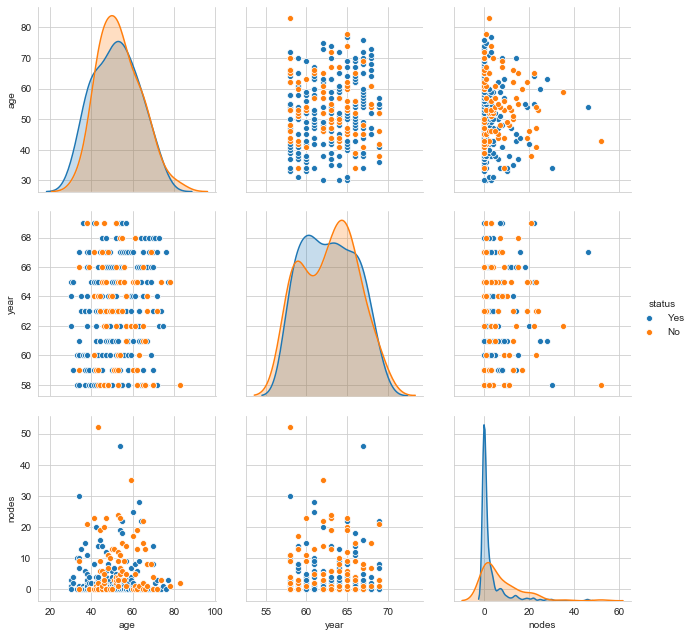

In [97]:
#Pair plots
sns.set_style('whitegrid')
sns.pairplot(haberman,hue='status',height=3)
plt.show()

the plot between years and nodes are comparively better

In [93]:
# Multivariate anaysis

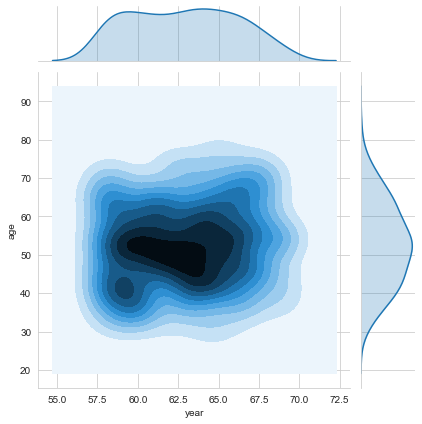

In [96]:
sns.jointplot(data=haberman,x='year',y='age',kind='kde')
plt.show()

from 1955 to 1965 operations done on the patients age group between 45 to 60

Conclusions:
1.Patient’s age and operation year alone are not deciding factors for his/her survival. Yet, people less than 35 years have more chance of survival.

2.Survival chance is inversely proportional to the number of positive axillary nodes. We also saw that the absence of positive axillary nodes cannot always guarantee survival.

3.The objective of classifying the survival status of a new patient based on the given features is a difficult task as the data is imbalanced.